We import what will serve us

In [167]:
from pandas import DataFrame, read_csv
import bigml.api
from bigml.api import BigML
import pandas as pd
import matplotlib.pyplot as plt

#### We connect to the bigml api

In [168]:
api = BigML(project='project/5db160c5f80b1640d6000224')

#### We recover the ensemble that interests us

In [170]:
ensemble = api.get_ensemble("ensemble/5db17205e476847468009274") 

#### We recover the importance of the fields

In [178]:
importances = ensemble['object']['importance']

In [179]:
importances

{'000000': 0.03343,
 '000001': 0.21197,
 '000002': 0.11167,
 '000003': 0.03459,
 '000004': 0.02733,
 '000005': 0.0842,
 '000006': 0.04554,
 '000007': 0.03143,
 '000008': 0.07517,
 '000009': 0.03969,
 '00000a': 0.07089,
 '00000b': 0.00123,
 '00000c': 0.00333,
 '00000d': 0.22028,
 '00000e': 0.00926}

#### We get the names of the fields

In [181]:
# refabriquer un dictionnaire avec les noms de colonnes (et non plus les n°)
importances_named = dict()
for column, importance in importances.items():
    column_name = ensemble['object']['ensemble']['fields'][column]['name']
    importances_named[column_name] = importance

importances_named

{'field1': 0.03343,
 'RevolvingUtilizationOfUnsecuredLines': 0.21197,
 'age': 0.11167,
 'DebtRatio': 0.03459,
 'MonthlyIncome': 0.02733,
 'MonthlyDebt': 0.0842,
 'DisposableIncome': 0.04554,
 'BalancedIncome': 0.03143,
 'NumberOfOpenCreditLinesAndLoans': 0.07517,
 'NumberRealEstateLoansOrLines': 0.03969,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.07089,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.00123,
 'NumberOfTimes90DaysLate': 0.00333,
 'WeightedOfLatePayment': 0.22028,
 'NumberOfDependents': 0.00926}

#### We display the histogram of the importance of the fields

Text(0.5, 0.98, 'Importance fields')

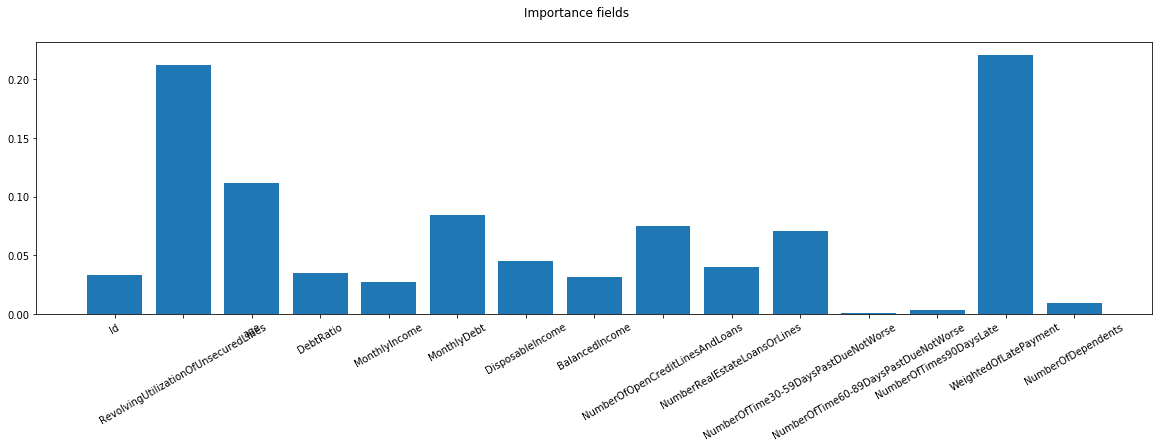

In [231]:
data = importances_named
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(20, 5), sharey=True)
axs.bar(names, values)

xtick_labels = ['Id','RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'MonthlyDebt', 'DisposableIncome', 'BalancedIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'WeightedOfLatePayment', 'NumberOfDependents', 'SeriousDlqin2yrs']
plt.xticks(names, xtick_labels, rotation=30)

fig.suptitle('Importance fields')

# We recover the importance of the fields for our ensemble

In [51]:
field_importance1 = read_csv('field_importances/summarry_report_ensemble1_BigML_5db1710d7811dd7f2d0087fc_Ensemble_Field_Importances.csv')
field_importance2 = read_csv('field_importances/summarry_report_ensemble2_BigML_5db171aa5299631c82008cdc_Ensemble_Field_Importances.csv')
field_importance3 = read_csv('field_importances/summarry_report_ensemble3_BigML_5db17205e476847468009274_Ensemble_Field_Importances.csv')
field_importance4 = read_csv('field_importances/summarry_report_ensemble4_BigML_5db1737de4768474680092a4_Ensemble_Field_Importances.csv')
field_importance5 = read_csv('field_importances/summarry_report_ensemble5_BigML_5db1742e5299631c82008d25_Ensemble_Field_Importances.csv')
field_importance6 = read_csv('field_importances/summarry_report_ensemble6_BigML_5db174c57811dd7f2d00884b_Ensemble_Field_Importances.csv')

In [52]:
field_importance1

,Field,Importance
0,WeightedOfLatePayment,0.22846
1,RevolvingUtilizationOfUnsecuredLines,0.21556
2,age,0.11136
3,NumberOfOpenCreditLinesAndLoans,0.08535
4,MonthlyDebt,0.07562
5,NumberOfTime30-59DaysPastDueNotWorse,0.07353
6,DisposableIncome,0.04642
7,DebtRatio,0.04405
8,NumberRealEstateLoansOrLines,0.03094
9,MonthlyIncome,0.02780


### We display the importance of the fields side by side in a table to compare them

In [6]:
fields_importances = DataFrame()
fields_importances['Field'] = field_importance1['Field']
fields_importances['Importance_ens1'] = field_importance1['Importance']
fields_importances['Importance_ens2'] = field_importance2['Importance']
fields_importances['Importance_ens3'] = field_importance3['Importance']
fields_importances['Importance_ens4'] = field_importance4['Importance']
fields_importances['Importance_ens5'] = field_importance5['Importance']
fields_importances['Importance_ens6'] = field_importance6['Importance']
fields_importances

,Field,Importance_ens1,Importance_ens2,Importance_ens3,Importance_ens4,Importance_ens5,Importance_ens6
0,WeightedOfLatePayment,0.22846,0.22337,0.22028,0.29976,0.29332,0.20481
1,RevolvingUtilizationOfUnsecuredLines,0.21556,0.21646,0.21197,0.22591,0.22442,0.15562
2,age,0.11136,0.10676,0.11167,0.11496,0.10566,0.12694
3,NumberOfOpenCreditLinesAndLoans,0.08535,0.07359,0.08420,0.07437,0.08539,0.10183
4,MonthlyDebt,0.07562,0.07186,0.07517,0.06766,0.07288,0.09339
5,NumberOfTime30-59DaysPastDueNotWorse,0.07353,0.07060,0.07089,0.04330,0.04561,0.07594
6,DisposableIncome,0.04642,0.04393,0.04554,0.03586,0.04378,0.05877
7,DebtRatio,0.04405,0.04283,0.03969,0.03567,0.03808,0.04091
8,NumberRealEstateLoansOrLines,0.03094,0.03965,0.03459,0.03349,0.03163,0.03764
9,MonthlyIncome,0.02780,0.03870,0.03343,0.03076,0.02818,0.02651


### We recover the different predictions

In [14]:
prediction_ensemble1 = read_csv('predictions/my_predictions1.csv')
prediction_ensemble2 = read_csv('predictions/my_predictions2.csv')
prediction_ensemble3 = read_csv('predictions/my_predictions3.csv')
prediction_ensemble4 = read_csv('predictions/my_predictions4.csv')
prediction_ensemble5 = read_csv('predictions/my_predictions5.csv')
prediction_ensemble6 = read_csv('predictions/my_predictions6.csv')
prediction_ensemble1

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1
0,126550,0.021277,90,0.007094,3100,21.992907,3078.007093,3100.000000,6,0,0,0,0,0,0,0,0
1,35772,0.130125,58,0.204989,18000,3689.795016,14310.204984,6000.000000,9,2,0,0,0,0,2,0,0
2,12265,0.546874,55,0.452236,7400,3346.547762,4053.452238,2466.666667,11,2,0,0,0,0,2,0,0
3,55944,0.590389,63,0.545423,5800,3163.454577,2636.545423,5800.000000,7,1,2,0,0,2,0,0,0
4,65176,0.022841,70,0.300000,0,97.000000,0.000000,0.000000,10,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,140491,0.303038,41,0.159878,14116,2256.840121,11859.159879,2823.200000,7,1,0,0,0,0,4,0,0
29996,36589,0.024190,71,0.177031,10500,1858.822969,8641.177031,10500.000000,14,2,1,0,0,1,0,0,0
29997,39804,1.000000,79,0.039920,500,19.960080,480.039920,500.000000,2,0,0,0,0,0,0,0,0
29998,69360,0.262211,58,0.554313,11000,6097.445684,4902.554316,3666.666667,19,3,1,0,0,1,2,0,0


In [15]:
for df in [prediction_ensemble1, prediction_ensemble2, prediction_ensemble3, prediction_ensemble4, prediction_ensemble5, prediction_ensemble6]:
    df.insert(13,"error",0)

prediction_ensemble1.head(10)

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,error,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1
0,126550,0.021277,90,0.007094,3100,21.992907,3078.007093,3100.000000,6,0,0,0,0,0,0,0,0,0
1,35772,0.130125,58,0.204989,18000,3689.795016,14310.204984,6000.000000,9,2,0,0,0,0,0,2,0,0
2,12265,0.546874,55,0.452236,7400,3346.547762,4053.452238,2466.666667,11,2,0,0,0,0,0,2,0,0
3,55944,0.590389,63,0.545423,5800,3163.454577,2636.545423,5800.000000,7,1,2,0,0,0,2,0,0,0
4,65176,0.022841,70,0.300000,0,97.000000,0.000000,0.000000,10,0,0,0,0,0,0,0,0,0
5,128169,0.058096,61,0.300000,0,1351.000000,0.000000,0.000000,5,1,0,0,0,0,0,0,0,0
6,89066,0.018784,36,1.913367,4166,7971.086635,-3805.086635,4166.000000,9,5,0,0,0,0,0,0,0,0
7,127788,0.000000,54,0.177666,12500,2220.822337,10279.177663,12500.000000,14,3,0,0,0,0,0,0,0,0
8,132120,0.004207,58,0.300000,0,1589.000000,0.000000,0.000000,16,1,0,0,0,0,0,0,0,0
9,51396,0.006867,50,0.312514,4450,1390.687487,3059.312513,4450.000000,4,1,0,0,0,0,0,0,0,0


### we count the True Positive, True Negative, False Positive, False Negative of the different predictions

In [35]:
TP_lines = (prediction_ensemble1['SeriousDlqin2yrs']==1) & (prediction_ensemble1['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble1['SeriousDlqin2yrs']==1) & ~(prediction_ensemble1['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble1['SeriousDlqin2yrs']==1) & (prediction_ensemble1['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble1['SeriousDlqin2yrs']==1) & ~(prediction_ensemble1['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble1.loc[TP_lines])
TN = len(prediction_ensemble1.loc[TN_lines])
FP = len(prediction_ensemble1.loc[FP_lines])
FN = len(prediction_ensemble1.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=360
TN=27785
FP=197
FN=1658


In [36]:
TP_lines = (prediction_ensemble2['SeriousDlqin2yrs']==1) & (prediction_ensemble2['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble2['SeriousDlqin2yrs']==1) & ~(prediction_ensemble2['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble2['SeriousDlqin2yrs']==1) & (prediction_ensemble2['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble2['SeriousDlqin2yrs']==1) & ~(prediction_ensemble2['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble2.loc[TP_lines])
TN = len(prediction_ensemble2.loc[TN_lines])
FP = len(prediction_ensemble2.loc[FP_lines])
FN = len(prediction_ensemble2.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=405
TN=27703
FP=282
FN=1610


In [37]:
TP_lines = (prediction_ensemble3['SeriousDlqin2yrs']==1) & (prediction_ensemble3['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble3['SeriousDlqin2yrs']==1) & ~(prediction_ensemble3['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble3['SeriousDlqin2yrs']==1) & (prediction_ensemble3['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble3['SeriousDlqin2yrs']==1) & ~(prediction_ensemble3['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble3.loc[TP_lines])
TN = len(prediction_ensemble3.loc[TN_lines])
FP = len(prediction_ensemble3.loc[FP_lines])
FN = len(prediction_ensemble3.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=342
TN=27842
FP=204
FN=1612


In [38]:
TP_lines = (prediction_ensemble4['SeriousDlqin2yrs']==1) & (prediction_ensemble4['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble4['SeriousDlqin2yrs']==1) & ~(prediction_ensemble4['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble4['SeriousDlqin2yrs']==1) & (prediction_ensemble4['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble4['SeriousDlqin2yrs']==1) & ~(prediction_ensemble4['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble4.loc[TP_lines])
TN = len(prediction_ensemble4.loc[TN_lines])
FP = len(prediction_ensemble4.loc[FP_lines])
FN = len(prediction_ensemble4.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=389
TN=27773
FP=230
FN=1608


In [40]:
TP_lines = (prediction_ensemble5['SeriousDlqin2yrs']==1) & (prediction_ensemble5['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble5['SeriousDlqin2yrs']==1) & ~(prediction_ensemble5['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble5['SeriousDlqin2yrs']==1) & (prediction_ensemble5['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble5['SeriousDlqin2yrs']==1) & ~(prediction_ensemble5['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble5.loc[TP_lines])
TN = len(prediction_ensemble5.loc[TN_lines])
FP = len(prediction_ensemble5.loc[FP_lines])
FN = len(prediction_ensemble5.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=370
TN=27656
FP=286
FN=1688


In [41]:
TP_lines = (prediction_ensemble6['SeriousDlqin2yrs']==1) & (prediction_ensemble6['SeriousDlqin2yrs.1']==1)
TN_lines = ~(prediction_ensemble6['SeriousDlqin2yrs']==1) & ~(prediction_ensemble6['SeriousDlqin2yrs.1']==1)
FP_lines = ~(prediction_ensemble6['SeriousDlqin2yrs']==1) & (prediction_ensemble6['SeriousDlqin2yrs.1']==1)
FN_lines = (prediction_ensemble6['SeriousDlqin2yrs']==1) & ~(prediction_ensemble6['SeriousDlqin2yrs.1']==1)

TP = len(prediction_ensemble6.loc[TP_lines])
TN = len(prediction_ensemble6.loc[TN_lines])
FP = len(prediction_ensemble6.loc[FP_lines])
FN = len(prediction_ensemble6.loc[FN_lines])
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}')

TP=347
TN=27721
FP=252
FN=1680


# Create Confusion Matrix

we charge our predictions

In [53]:
df_evaluation = read_csv('predictions/my_predictions3.csv')
df_evaluation

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,0,0,0,0,1,0,0
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,0,0,0,0,0,0,0
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,0,0,0,0,0,0,0
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,0,0,0,0,0,0,0


we load our predictions with the probability fields

In [76]:
df_evaluation_with_proba = read_csv('predictions/my_predictions3_with_probability.csv')
df_evaluation_with_proba

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0,0.75704,0.78783,0.21217
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0,0.97530,0.98484,0.01516
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0,0.97626,0.98414,0.01586
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0,0.91840,0.93657,0.06343
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0,0.99033,0.99376,0.00625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,0,0,0,0,1,0,0,0.98737,0.99167,0.00833
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,0,0,0,0,0,0,0,0.99071,0.99353,0.00647
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,0,0,0,0,0,0,0,0.86427,0.90176,0.09825
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,0,0,0,0,0,0,0,0.83692,0.86104,0.13897


### we rename our columns SeriousDlqin2yrs

In [54]:

df_evaluation.rename(columns = {list(df_evaluation)[15]:'SeriousDlqin2yrs_Actual'}, inplace=True)
df_evaluation.rename(columns = {list(df_evaluation)[16]:'SeriousDlqin2yrs_Predicted'}, inplace=True)
df_evaluation

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,0,0,0,0,1,0,0
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,0,0,0,0,0,0,0
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,0,0,0,0,0,0,0
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,0,0,0,0,0,0,0


In [77]:

df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[15]:'SeriousDlqin2yrs_Actual'}, inplace=True)
df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[16]:'SeriousDlqin2yrs_Predicted'}, inplace=True)
df_evaluation_with_proba

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0,0.75704,0.78783,0.21217
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0,0.97530,0.98484,0.01516
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0,0.97626,0.98414,0.01586
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0,0.91840,0.93657,0.06343
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0,0.99033,0.99376,0.00625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,0,0,0,0,1,0,0,0.98737,0.99167,0.00833
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,0,0,0,0,0,0,0,0.99071,0.99353,0.00647
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,0,0,0,0,0,0,0,0.86427,0.90176,0.09825
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,0,0,0,0,0,0,0,0.83692,0.86104,0.13897


In [57]:
# Display confusion matrix
confusion_matrix = pd.crosstab(df_evaluation['SeriousDlqin2yrs_Actual'], df_evaluation['SeriousDlqin2yrs_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0    1
Actual               
0          27842  204
1           1612  342


In [78]:
# Display confusion matrix
confusion_matrix_with_proba = pd.crosstab(df_evaluation_with_proba['SeriousDlqin2yrs_Actual'], df_evaluation_with_proba['SeriousDlqin2yrs_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix_with_proba)

Predicted      0    1
Actual               
0          27842  204
1           1612  342


#### Create an error column

In [58]:
df_evaluation['Error'] = ""
df_evaluation.head()

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,Error
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0,
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0,
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0,
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0,
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0,


In [79]:
df_evaluation_with_proba['Error'] = ""
df_evaluation_with_proba.head()

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,...,0,0,2,0,0,0,0.75704,0.78783,0.21217,
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,...,0,0,0,0,0,0,0.97530,0.98484,0.01516,
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,...,0,0,0,3,0,0,0.97626,0.98414,0.01586,
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,...,0,0,0,2,0,0,0.91840,0.93657,0.06343,
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,...,0,0,0,0,0,0,0.99033,0.99376,0.00625,


#### we define a function to fill the error column

In [59]:
def eval_error(row):
    actual = row['SeriousDlqin2yrs_Actual']
    predicted = row['SeriousDlqin2yrs_Predicted']
    if actual == 1 and actual == predicted:
        row['Error'] = "TP"
    elif actual == 1 and predicted == 0:
        row['Error'] = "FN"
    elif actual == 0 and predicted == 1:
        row['Error'] = "FP"
    else:
        row['Error'] = "TN"
        
    return row['Error']
        

In [61]:
df_evaluation['Error'] = df_evaluation.apply(eval_error, axis=1)
df_evaluation

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,Error
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,2,0,0,2,0,0,0,TN
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,0,0,0,0,0,0,0,TN
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,0,0,0,0,3,0,0,TN
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,0,0,0,0,2,0,0,TN
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,0,0,0,0,0,0,0,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,0,0,0,0,1,0,0,TN
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,0,0,0,0,0,0,0,TN
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,0,0,0,0,0,0,0,TN
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,0,0,0,0,0,0,0,TN


In [80]:
df_evaluation_with_proba['Error'] = df_evaluation_with_proba.apply(eval_error, axis=1)
df_evaluation_with_proba

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,...,0,0,2,0,0,0,0.75704,0.78783,0.21217,TN
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,...,0,0,0,0,0,0,0.97530,0.98484,0.01516,TN
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,...,0,0,0,3,0,0,0.97626,0.98414,0.01586,TN
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,...,0,0,0,2,0,0,0.91840,0.93657,0.06343,TN
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,...,0,0,0,0,0,0,0.99033,0.99376,0.00625,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,...,0,0,0,1,0,0,0.98737,0.99167,0.00833,TN
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,...,0,0,0,0,0,0,0.99071,0.99353,0.00647,TN
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,...,0,0,0,0,0,0,0.86427,0.90176,0.09825,TN
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,...,0,0,0,0,0,0,0.83692,0.86104,0.13897,TN


#### We export our evaluation file in csv

In [81]:
df_evaluation_with_proba.to_csv('evaluation_dataset3_with_proba.csv')

#### we load our evaluation file and we count the values of the column of error

In [81]:
df_evaluation.to_csv('evaluation_dataset3.csv')

In [161]:
# print(df_evaluation[df_evaluation.Error == 'FN'].SeriousDlqin2yrs_Actual.sum())
df_evaluation.groupby(['Error']).Error.count()

Error
FN     1612
FP      204
TN    27842
TP      342
Name: Error, dtype: int64

In [134]:
# print(df_evaluation[df_evaluation.Error == 'FN'].SeriousDlqin2yrs_Actual.sum())
total_errors = df_evaluation_with_proba.groupby(['Error']).Error.count()

In [137]:
total_errors

Error
FN     1612
FP      204
TN    27842
TP      342
Name: Error, dtype: int64

In [83]:
df_evaluation_with_proba


,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,107635,0.562935,31,0.437759,5550,2429.562239,3120.437761,5550.000000,7,1,...,0,0,2,0,0,0,0.75704,0.78783,0.21217,TN
1,142687,0.963725,64,0.533518,4340,2315.466484,2024.533516,4340.000000,6,1,...,0,0,0,0,0,0,0.97530,0.98484,0.01516,TN
2,19894,0.025860,50,0.340333,11000,3743.659667,7256.340333,2750.000000,12,2,...,0,0,0,3,0,0,0.97626,0.98414,0.01586,TN
3,125726,0.616112,58,0.457739,15628,7153.542263,8474.457737,5209.333333,19,2,...,0,0,0,2,0,0,0.91840,0.93657,0.06343,TN
4,6641,0.019204,66,0.089588,7500,671.910413,6828.089587,7500.000000,9,1,...,0,0,0,0,0,0,0.99033,0.99376,0.00625,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,141054,0.017272,55,0.305539,5000,1527.694460,3472.305540,2500.000000,10,1,...,0,0,0,1,0,0,0.98737,0.99167,0.00833,TN
29996,77489,0.050496,66,0.300000,0,132.000000,0.000000,0.000000,7,0,...,0,0,0,0,0,0,0.99071,0.99353,0.00647,TN
29997,112258,0.541167,29,0.055688,2100,116.944313,1983.055687,2100.000000,2,0,...,0,0,0,0,0,0,0.86427,0.90176,0.09825,TN
29998,39435,1.000000,27,0.064624,1500,96.935376,1403.064624,1500.000000,2,0,...,0,0,0,0,0,0,0.83692,0.86104,0.13897,TN


#### We create a DataFrame with our prediction errors (Negative False and Positive False)

In [114]:
FP_or_FN= (df_evaluation_with_proba['Error'] == 'FN') |  (df_evaluation_with_proba['Error'] == 'FP')
df_error = df_evaluation_with_proba.loc[FP_or_FN]
df_error

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
7,93912,0.000000,47,0.459967,14050,6462.540031,7587.459969,14050.000000,14,4,...,2,0,4,0,1,0,0.72717,0.75716,0.24284,FN
29,10533,1.025512,39,0.655335,5500,3604.344667,1895.655333,5500.000000,11,2,...,0,0,1,0,1,0,0.70390,0.75863,0.24137,FN
49,22087,1.000000,41,0.091144,4256,387.908855,3868.091145,1418.666667,2,0,...,0,5,15,2,0,1,0.60826,0.34937,0.65063,FP
74,81534,0.044924,42,1.032312,9500,9806.967686,-306.967686,2375.000000,9,6,...,0,0,1,3,1,0,0.84133,0.88574,0.11426,FN
95,84757,0.703409,38,0.035770,7016,250.964228,6765.035772,2338.666667,5,0,...,0,0,0,2,1,0,0.92256,0.94424,0.05576,FN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29929,46359,1.000000,26,0.300000,0,332.000000,0.000000,0.000000,2,0,...,0,0,0,0,1,0,0.85680,0.87880,0.12121,FN
29931,62042,0.999578,23,0.214450,1300,278.785550,1021.214450,1300.000000,3,0,...,0,0,2,0,1,0,0.57007,0.63044,0.36956,FN
29953,78131,0.557848,57,0.314969,10200,3212.685034,6987.314966,5100.000000,10,1,...,0,0,2,1,1,0,0.81153,0.84038,0.15962,FN
29966,10437,0.462418,43,1.416861,3000,4250.583138,-1250.583138,3000.000000,12,1,...,0,0,0,0,1,0,0.87234,0.90136,0.09864,FN


Create a probability column

In [115]:
df_error.insert(21,"Probability",0)
df_error.head(10)

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
7,93912,0.000000,47,0.459967,14050,6462.540031,7587.459969,14050.000000,14,4,...,0,4,0,1,0,0.72717,0.75716,0.24284,FN,0
29,10533,1.025512,39,0.655335,5500,3604.344667,1895.655333,5500.000000,11,2,...,0,1,0,1,0,0.70390,0.75863,0.24137,FN,0
49,22087,1.000000,41,0.091144,4256,387.908855,3868.091145,1418.666667,2,0,...,5,15,2,0,1,0.60826,0.34937,0.65063,FP,0
74,81534,0.044924,42,1.032312,9500,9806.967686,-306.967686,2375.000000,9,6,...,0,1,3,1,0,0.84133,0.88574,0.11426,FN,0
95,84757,0.703409,38,0.035770,7016,250.964228,6765.035772,2338.666667,5,0,...,0,0,2,1,0,0.92256,0.94424,0.05576,FN,0
100,143785,0.668199,41,0.555294,8924,4955.444709,3968.555291,2231.000000,9,2,...,0,0,3,1,0,0.93465,0.95290,0.04710,FN,0
119,49992,1.427146,65,0.210962,2900,611.789037,2288.210963,2900.000000,4,0,...,0,5,0,1,0,0.47591,0.54325,0.45675,FN,0
120,50817,0.000000,47,0.470153,9196,4323.529848,4872.470152,2299.000000,10,2,...,1,8,3,1,0,0.44754,0.51545,0.48455,FN,0
124,16893,0.465296,57,0.604121,12715,7681.395883,5033.604117,6357.500000,18,5,...,0,0,1,1,0,0.90843,0.93222,0.06778,FN,0
131,41947,0.539384,32,0.148717,3583,532.851284,3050.148716,3583.000000,8,0,...,6,20,0,0,1,0.61236,0.32095,0.67905,FP,0


#### We create a function to fill the column probability
* Using the value of "1 probability" for false positives
* Using the value of "0 probability" for false negatives

In [121]:
def add_proba(row):

    if row['Error'] == "FP":
        row['Probability'] = row['1 probability'] 
    else:
        row['Probability'] = row['0 probability'] 
    
    return row['Probability']
     

In [127]:
df_error['Probability'] = df_error.apply(add_proba, axis=1)
df_error

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability,Probality
7,93912,0.000000,47,0.459967,14050,6462.540031,7587.459969,14050.000000,14,4,...,4,0,1,0,0.72717,0.75716,0.24284,FN,0.75716,None
29,10533,1.025512,39,0.655335,5500,3604.344667,1895.655333,5500.000000,11,2,...,1,0,1,0,0.70390,0.75863,0.24137,FN,0.75863,None
49,22087,1.000000,41,0.091144,4256,387.908855,3868.091145,1418.666667,2,0,...,15,2,0,1,0.60826,0.34937,0.65063,FP,0.65063,None
74,81534,0.044924,42,1.032312,9500,9806.967686,-306.967686,2375.000000,9,6,...,1,3,1,0,0.84133,0.88574,0.11426,FN,0.88574,None
95,84757,0.703409,38,0.035770,7016,250.964228,6765.035772,2338.666667,5,0,...,0,2,1,0,0.92256,0.94424,0.05576,FN,0.94424,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29929,46359,1.000000,26,0.300000,0,332.000000,0.000000,0.000000,2,0,...,0,0,1,0,0.85680,0.87880,0.12121,FN,0.87880,None
29931,62042,0.999578,23,0.214450,1300,278.785550,1021.214450,1300.000000,3,0,...,2,0,1,0,0.57007,0.63044,0.36956,FN,0.63044,None
29953,78131,0.557848,57,0.314969,10200,3212.685034,6987.314966,5100.000000,10,1,...,2,1,1,0,0.81153,0.84038,0.15962,FN,0.84038,None
29966,10437,0.462418,43,1.416861,3000,4250.583138,-1250.583138,3000.000000,12,1,...,0,0,1,0,0.87234,0.90136,0.09864,FN,0.90136,None


In [128]:
df_error.head()

,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability,Probality
7,93912,0.000000,47,0.459967,14050,6462.540031,7587.459969,14050.000000,14,4,...,4,0,1,0,0.72717,0.75716,0.24284,FN,0.75716,None
29,10533,1.025512,39,0.655335,5500,3604.344667,1895.655333,5500.000000,11,2,...,1,0,1,0,0.70390,0.75863,0.24137,FN,0.75863,None
49,22087,1.000000,41,0.091144,4256,387.908855,3868.091145,1418.666667,2,0,...,15,2,0,1,0.60826,0.34937,0.65063,FP,0.65063,None
74,81534,0.044924,42,1.032312,9500,9806.967686,-306.967686,2375.000000,9,6,...,1,3,1,0,0.84133,0.88574,0.11426,FN,0.88574,None
95,84757,0.703409,38,0.035770,7016,250.964228,6765.035772,2338.666667,5,0,...,0,2,1,0,0.92256,0.94424,0.05576,FN,0.94424,None


they are sorted in descending order

In [131]:
df_error.sort_values(by = 'Probability', ascending=False, inplace=True)
df_error

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,field1,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,...,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability,Probality
10821,128521,0.009786,78,0.300000,0,9.000000,0.000000,0.000000,2,0,...,0,0,1,0,0.99642,0.99794,0.00206,FN,0.99794,None
17050,119223,0.000000,72,0.169971,9583,1628.830033,7954.169967,9583.000000,3,1,...,0,0,1,0,0.99578,0.99771,0.00229,FN,0.99771,None
18040,143743,0.009300,58,0.065789,18467,1214.934216,17252.065784,6155.666667,7,2,...,0,2,1,0,0.99516,0.99739,0.00261,FN,0.99739,None
20091,123997,0.027271,66,0.300000,0,593.000000,0.000000,0.000000,3,1,...,0,0,1,0,0.99537,0.99709,0.00292,FN,0.99709,None
4141,84326,0.000000,60,0.000000,9916,0.000000,9916.000000,9916.000000,3,0,...,0,0,1,0,0.99469,0.99680,0.00320,FN,0.99680,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21119,71506,0.911898,41,0.166723,2950,491.833278,2458.166722,590.000000,5,1,...,11,4,1,0,0.44023,0.50154,0.49846,FN,0.50154,None
900,46959,1.000000,49,0.375528,4968,1865.624470,3102.375530,1656.000000,6,1,...,7,2,0,1,0.44674,0.49872,0.50129,FP,0.50129,None
2763,102252,1.000000,59,0.402893,4700,1893.597105,2806.402895,2350.000000,6,1,...,7,1,0,1,0.44674,0.49872,0.50129,FP,0.50129,None
5136,39254,1.051793,38,0.332022,1779,590.667978,1188.332022,1779.000000,2,0,...,5,0,0,1,0.44484,0.49963,0.50037,FP,0.50037,None


We select the first 100

In [133]:
df_error_100 = df_error.head(100)
df_error_100.to_csv('100_biggest_errors.csv')

The costs are calculated

In [141]:
cout_fn = total_errors['FN'] *(-500)
cout_fp = total_errors['FP'] * ( -2500)
cout_tn = total_errors['TN'] * 500
cout_tp = total_errors['TP'] * 0

print('FN :',cout_fn) 
print('FP :',cout_fp) 
print('TN :',cout_tn)
print('TP :',cout_tp)

FN : -806000
FP : -510000
TN : 13921000
TP : 0


In [143]:
gain = cout_fn + cout_fp + cout_tn + cout_tp
gain

12605000

#### We create the cost calculation function

In [150]:
def cost_threshold(threshold):
    prediction_threshold = df_evaluation_with_proba['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1)
    N_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 0)

    TP = len(df_evaluation_with_proba.loc[P_pred & P_real])
    TN = len(df_evaluation_with_proba.loc[N_pred & N_real])
    FP = len(df_evaluation_with_proba.loc[P_pred & N_real])
    FN = len(df_evaluation_with_proba.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

#### We create the graph

<function matplotlib.pyplot.show(*args, **kw)>

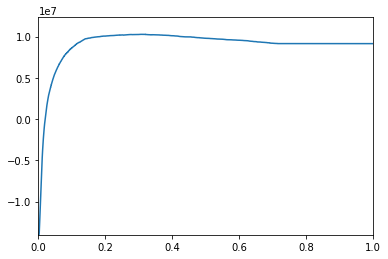

In [176]:
table = [cost_threshold(n/30000) for n in range(0,30000)]
threshold = [n/30000 for n in range(0,30000)]
plt.axis([0, 1,min(table),1.2*max(table)])
plt.plot(threshold, table)
plt.show

In [159]:
max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu en {max_threshold}')

Le gain maximum est 10267500 et il est obtenu en 0.31233333333333335


In [233]:
max_val = max(table)
max_threshold = table.index(max_val)/30000
print(f'Le gain maximum est {max_val} et il est obtenu en {max_threshold}')

Le gain maximum est 10267500 et il est obtenu en 0.31233333333333335


##### we calculate the positives and negatives

In [162]:
positive = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1)
nb_positive=len(df_evaluation_with_proba.loc[positive])
nb_negative=len(df_evaluation_with_proba.loc[~positive])

##### we calculate the AUC 
* we classe the column
* we calculate the AUc in a loop

In [163]:
result = df_evaluation_with_proba[['SeriousDlqin2yrs_Actual','1 probability']]
threshold_list = result.sort_values(by='1 probability',ascending=False)['SeriousDlqin2yrs_Actual'].values

auc = 0
P_cumul = 0
for i in range(len(threshold_list)):
    if threshold_list[i] == 1:
        P_cumul += 1
    else:
        auc += P_cumul
        
auc = auc/(nb_positive*nb_negative)

In [164]:
print(f'AUC={auc}')

AUC=0.8697727253318517


In [166]:

# Tri des données pour préparer le calcul de AUC
df4_sorted = df_evaluation_with_proba.sort_values('1 probability', ascending=False)

#  Calcul de la somme des négatifs en dessous de chaque positifs (1 probability est inférieur)
N_sum_below = 0
for index in range(len(df4_sorted)):
    if df4_sorted['SeriousDlqin2yrs_Actual'].iloc[index] == 1:
        N_sum_below += df4_sorted['SeriousDlqin2yrs_Actual'][index+1:].value_counts().loc[0]

print(N_sum_below)

# Calcul du produit nombre N * nombre P
N_number = df4_sorted['SeriousDlqin2yrs_Actual'].value_counts().loc[0]
P_number  = df4_sorted['SeriousDlqin2yrs_Actual'].value_counts().loc[1]
NP_product = N_number * P_number

# Calcul auc
AUC = N_sum_below / NP_product
AUC

47665184


0.8697727253318517

# Sur les 100 plus grosse erreurs

   * 100% n'ont aucuns jours de retard 
   * 75% on plus de 6 NumberOfOpenCreditLinesAndLoans
   * environ 80% ont plus de 40 ans
   * environ 60% ont plus de 50 ans 

   * 20% avait 0 en MontlyIncome et ont été corrigé à 0.3 en DebtRatio
      * Avec eux 50% sont audessus de 0.3 en DebtRatio

Maud SONET